##### Importerar biblotek 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


 ##### Importerar csv filen och döper den till df samt visar information om datan

In [9]:
df = pd.read_csv("diamonds.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


#####  Visa de första raderna.Kontrollera saknade värden och datatyper

In [10]:
print(df.head())
print(df.isnull().sum())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


##### Rensar datan


In [14]:
# Ta bort rader med orimliga dimensioner
df_clean = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# Hantera outliers med IQR för pris
Q1_price = df_clean['price'].quantile(0.25)
Q3_price = df_clean['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df_clean = df_clean[(df_clean['price'] >= lower_bound_price) & (df_clean['price'] <= upper_bound_price)]

# Hantera outliers för carat
Q1_carat = df_clean['carat'].quantile(0.25)
Q3_carat = df_clean['carat'].quantile(0.75)
IQR_carat = Q3_carat - Q1_carat
lower_bound_carat = Q1_carat - 1.5 * IQR_carat
upper_bound_carat = Q3_carat + 1.5 * IQR_carat
df_clean = df_clean[(df_clean['carat'] >= lower_bound_carat) & (df_clean['carat'] <= upper_bound_carat)]

# Kontrollera rimliga värden för depth och table (baserat på typiska intervall)
df_clean = df_clean[(df_clean['depth'] >= 50) & (df_clean['depth'] <= 75)]
df_clean = df_clean[(df_clean['table'] >= 40) & (df_clean['table'] <= 80)]

# Spara rensad data
df_clean.to_csv("diamonds_clean.csv", index=False)
print("Rensad data sparad. Antal rader före:", len(df), "efter:", len(df_clean))

Rensad data sparad. Antal rader före: 53940 efter: 50101


##### Genomsnittligt pris per slipkvalitet

In [16]:
avg_price_by_cut = df_clean.groupby('cut')['price'].mean().reset_index()
print(avg_price_by_cut)

         cut        price
0       Fair  3417.887955
1       Good  3235.751033
2      Ideal  2795.720096
3    Premium  3495.766479
4  Very Good  3216.552629


##### Genomsnittligt pris per färg

In [17]:
avg_price_by_color = df_clean.groupby('color')['price'].mean().reset_index()
print(avg_price_by_color)

  color        price
0     D  2693.953281
1     E  2612.063800
2     F  3069.119973
3     G  3213.145387
4     H  3512.656097
5     I  3648.634668
6     J  3829.716926


##### Genomsnittligt pris per klarhet

In [18]:
avg_price_by_clarity = df_clean.groupby('clarity')['price'].mean().reset_index()
print(avg_price_by_clarity)

  clarity        price
0      I1  3053.040128
1      IF  2123.346177
2     SI1  3277.457262
3     SI2  3732.636364
4     VS1  3151.438596
5     VS2  3108.938947
6    VVS1  2118.716063
7    VVS2  2789.785891


##### Beräkna korrelation mellan pris och karat

In [19]:
# Beräkna korrelation
correlation = df_clean[['carat', 'price']].corr()
print("Korrelationsmatris:\n", correlation)

# Korrelation per slipkvalitet
print("\nKorrelation per slipkvalitet:")
for cut in df_clean['cut'].unique():
    subset = df_clean[df_clean['cut'] == cut]
    corr = subset[['carat', 'price']].corr().iloc[0, 1]
    print(f"{cut}: {corr:.3f}")

Korrelationsmatris:
           carat     price
carat  1.000000  0.918855
price  0.918855  1.000000

Korrelation per slipkvalitet:
Ideal: 0.928
Premium: 0.921
Good: 0.921
Very Good: 0.923
Fair: 0.839


##### Visualisera sambandet

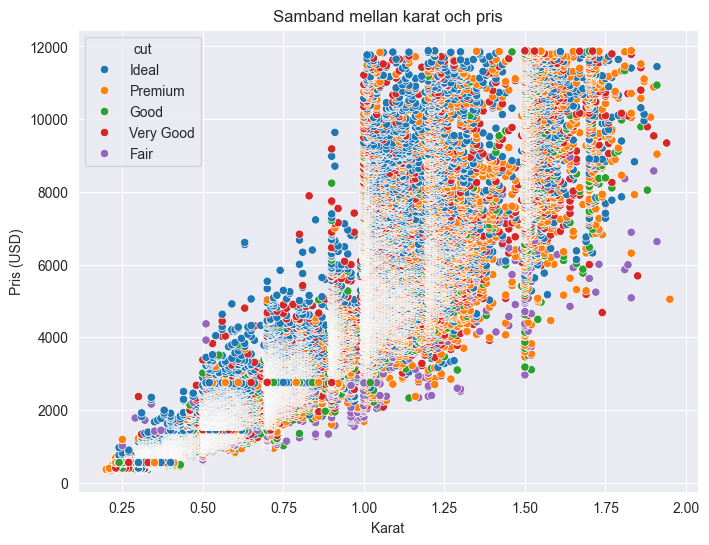

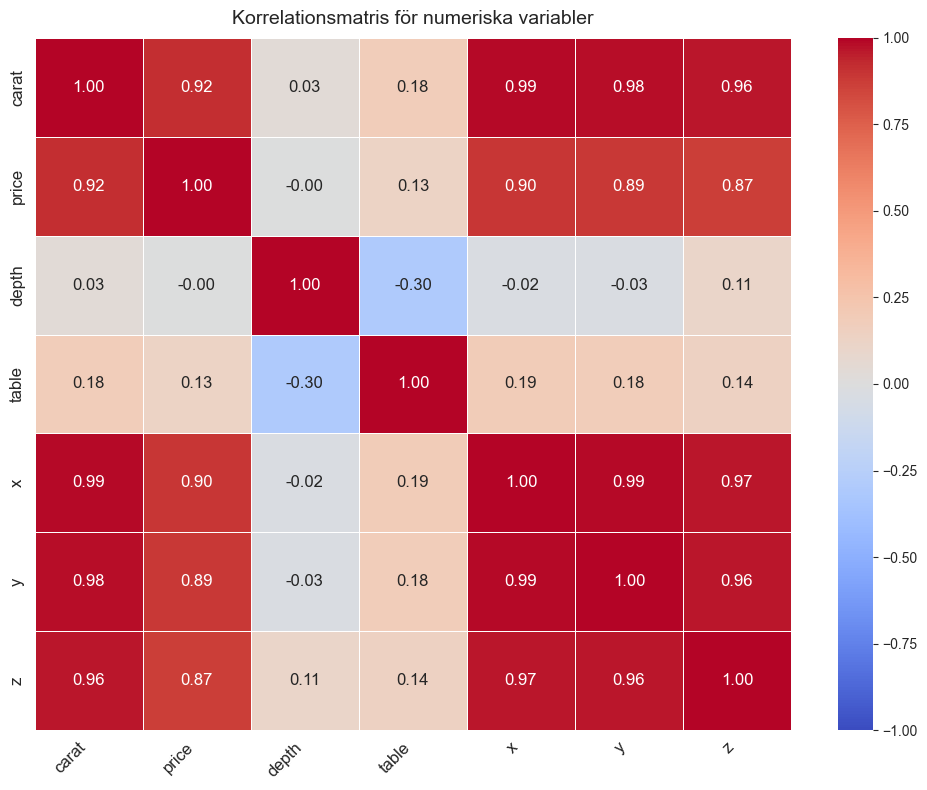

In [23]:
# Scatterplot för karat vs pris
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=df_clean)
plt.title("Samband mellan karat och pris")
plt.xlabel("Karat")
plt.ylabel("Pris (USD)")
plt.savefig("carat_vs_price.png")
plt.show()


# Heatmap för korrelationer
plt.figure(figsize=(10, 8))
corr_matrix = df_clean[['carat', 'price', 'depth', 'table', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Korrelationsmatris för numeriska variabler", fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

##### Segmentera genomsnittspris per karat-intervall


Genomsnittspris per karat-intervall:
   carat_range        price
0       0-0.5   839.534390
1     0.5-1.0  2808.195588
2     1.0-1.5  6222.181779
3     1.5-2.0  9255.734645


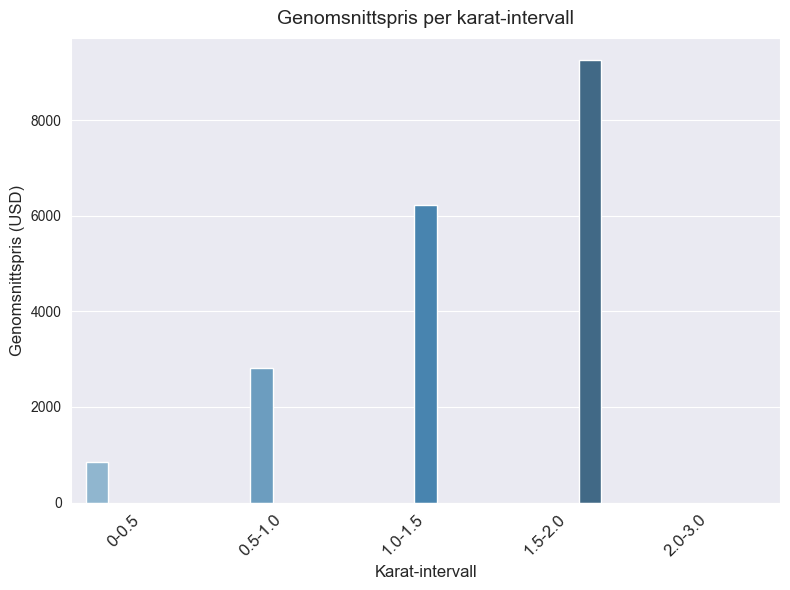

In [27]:
# Skapa karat-intervall
bins = [0, 0.5, 1.0, 1.5, 2.0, 3.0]
labels = ['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-3.0']
df_clean['carat_range'] = pd.cut(df_clean['carat'], bins=bins, labels=labels)

# Beräkna genomsnittspris per intervall med observed=True
avg_price_by_carat_range = df_clean.groupby('carat_range', observed=True)['price'].mean().reset_index()
print("\nGenomsnittspris per karat-intervall:\n", avg_price_by_carat_range)

# Visualisera
plt.figure(figsize=(8, 6))
sns.barplot(x='carat_range', y='price', hue='carat_range', data=avg_price_by_carat_range, palette='Blues_d', legend=False)
plt.title("Genomsnittspris per karat-intervall", fontsize=14, pad=10)
plt.xlabel("Karat-intervall", fontsize=12)
plt.ylabel("Genomsnittspris (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.savefig("avg_price_by_carat_range.png")
plt.show()